In [35]:
import numpy as np
import numpy.random as npr
from scipy.special import binom as binom_coeff
from matplotlib import pyplot as plt

In [18]:
def ent_prod(x):
    return x * np.log(x, where=x > 0, out=np.zeros_like(x, dtype=float))

def p_binom(k, n, p):
    return binom_coeff(n, k) * p**k * (1 - p)**(n-k)

def s_binom(n, p0, kmax):
    n = n[..., None]
    p0 = p0[..., None]
    k = np.arange(kmax + 1)
    p = p_binom(k, n, p0)
    return -ent_prod(p).sum(-1)

In [7]:
n = npr.randint(7, size=(5, 5))
n_r = n // 2

In [9]:
p0 = np.divide(n_r, n, where=n>0, out=np.zeros_like(n_r, dtype=float))

In [20]:
s = s_binom(n, p0, 6)

In [25]:
s_binom(n[0, 0], p0[0, 0], 6)

1.4075317407193153

In [125]:
def p_resting_to_migrating(r0, r1, a, b):
    rprod = (r0 * r1)**b
    p =  rprod / (rprod + ((r0 - a) * (r1 + a))**b)
    return p

def p_migrating_to_resting(r0, r1, a, b):
    rprod = (r0 * r1)**b
    p = rprod / (rprod + ((r0 + a) * (r1 + a))**b)
    return p

In [126]:
rho = np.linspace(0, 1, 101)
r0, r1 = np.meshgrid(rho, rho)
a = 0.1
b = 20
levels = [0, 0.25, 0.5, 0.75, 1]
levels = np.linspace(0, 1, 21, endpoint=True)
# levels = None

/home/simon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/simon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


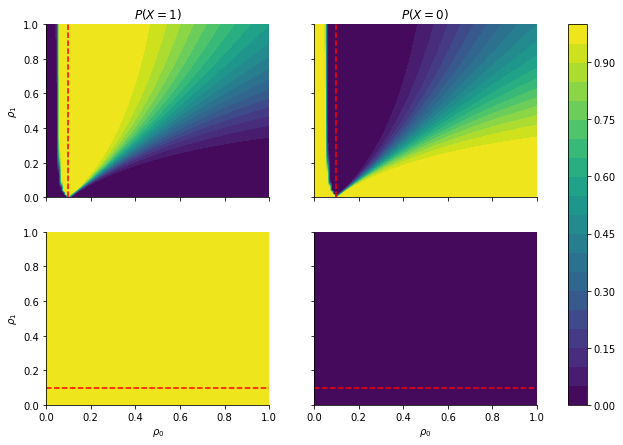

In [127]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(11,7))
plt.axes(axes[0, 0])
contour = plt.contourf(r0, r1, p_resting_to_migrating(r0, r1, a, b), levels=levels)
# plt.xlabel('$\\rho_0$')
plt.title('$P(X = 1)$')
plt.ylabel('$\\rho_1$')
# plt.axhline(y=a, c='r', ls='--', label='$\\rho_1 = a$')
plt.axvline(x=a, c='r', ls='--', label='$\\rho_0 = a$')

plt.axes(axes[0, 1])
plt.title('$P(X = 0)$')
plt.contourf(r0, r1, 1 - p_resting_to_migrating(r0, r1, a, b), levels=levels)
# plt.axhline(y=a, c='r', ls='--', label='$\\rho_1 = a$')
plt.axvline(x=a, c='r', ls='--', label='$\\rho_0 = a$')
# plt.plot([0., 1.], [0., 1.], 'r--')
# plt.colorbar()
# plt.legend()

plt.axes(axes[1, 0])
plt.ylabel('$\\rho_1$')
plt.contourf(r0, r1, 1 - p_migrating_to_resting(r0, r1, a, b), levels=levels)
plt.axhline(y=a, c='r', ls='--', label='$\\rho_1 = a$')
# plt.axvline(x=a, c='r', ls='--', label='$\\rho_0 = a$')
plt.xlabel('$\\rho_0$')

plt.axes(axes[1, 1])
plt.xlabel('$\\rho_0$')
plt.contourf(r0, r1, p_migrating_to_resting(r0, r1, a, b), levels=levels)
plt.axhline(y=a, c='r', ls='--', label='$\\rho_1 = a$')
# plt.axvline(x=a, c='r', ls='--', label='$\\rho_0 = a$')

plt.colorbar(contour, ax=axes.ravel().tolist())
# plt.savefig('State probabilities.pdf', bbox_inches=0)

In [61]:
plt.plot?